# 제주특별자치도 내국인 방문 관광객 데이터 분석

***
+ 목차
0. 데이터 가져오기
1. 여행 형태 분석
2. 여행 교통수단, 경비, 숙박 분석
3. 여행 주요 활동 및 만족도 분석
4. 여행 평가 분석  
 +. 제주도 지도

## 설명 동영상 링크
https://youtu.be/WN4hmIoKb64

## 0. 제주여행 데이터 가져오기
자료 출처 : 제주특별자치도,「제주특별자치도방문관광객실태조사 - 2019년 데이터 사용  
https://kosis.kr/statHtml/statHtml.do?orgId=218&tblId=DT_21807N_A013&conn_path=I3  

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
제주여행_형태 = pd.read_excel('data/제주여행_형태.xlsx')

제주여행_경비 = pd.read_excel('data/제주여행_평균지출경비.xlsx')
제주여행_교통 = pd.read_excel('data/제주여행_교통수단.xlsx')
제주여행_숙박 = pd.read_excel('data/제주여행_숙박시설.xlsx')

제주여행_활동 = pd.read_excel('data/제주여행_활동.xlsx')
제주여행_만족활동 = pd.read_excel('data/제주여행_활동_만족도.xlsx')

제주여행_평가 = pd.read_excel('data/제주여행_평가.xlsx')

In [3]:
성별 = ['남자', '여자']
연령 = ['15~20세', '21~30세', '31~40세', '41~50세', '51~60세', '61세 이상']
방문횟수 = ['1회', '2회', '3회', '4회 이상']
전체 = ['소계']

## 1. 제주여행 형태 분석

In [4]:
제주여행_형태 = 제주여행_형태.set_index('특성별')
제주여행_형태 = 제주여행_형태.drop('응답자수 (명)', axis=1)

#### 특성별 여행 형태

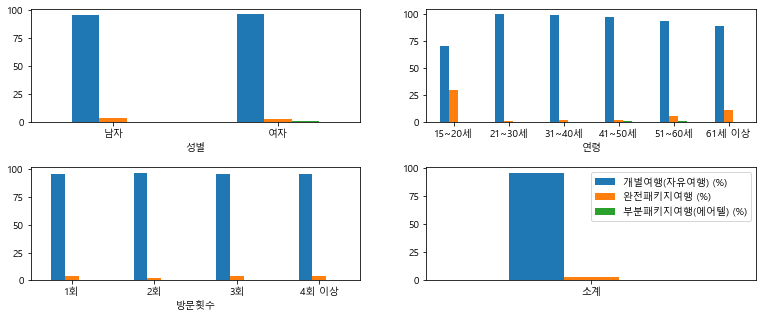

In [5]:
fig, ax_list = plt.subplots(2,2)

제주여행_형태.filter(성별, axis = 0).plot(kind='bar', rot=0, xlabel='성별', ax = ax_list[0,0], legend=False, figsize=(13,5))
제주여행_형태.filter(연령, axis = 0).plot(kind='bar', rot=0, xlabel='연령', ax = ax_list[0,1], legend=False)
제주여행_형태.filter(방문횟수, axis = 0).plot(kind='bar', rot=0, xlabel='방문횟수', ax = ax_list[1,0], legend=False)
제주여행_형태.filter(전체, axis = 0).plot(kind='bar', rot=0, xlabel='', ax = ax_list[1,1])

plt.subplots_adjust(hspace = 0.4, wspace = 0.2)

제주도 여행 형태를 분석해보았을 때, 패키지 여행보다 자유 여행이 독보적으로 많은 것을 확인할 수 있다.  
주로 10대와 50대 이상에서 패키지 여행을 이용하는 사람들을 볼 수 있다.  
이를 참고하여 내국인 제주도 여행에 대한 자료를 더 분석해보려고 한다.

## 2. 제주여행 교통수단, 경비, 숙박 분석

### 2-1. 교통수단

In [6]:
제주여행_교통 = 제주여행_교통.set_index('특성별')
제주여행_교통 = 제주여행_교통.drop('응답자수 (명)', axis=1)

#### 연령별 이용 교통수단

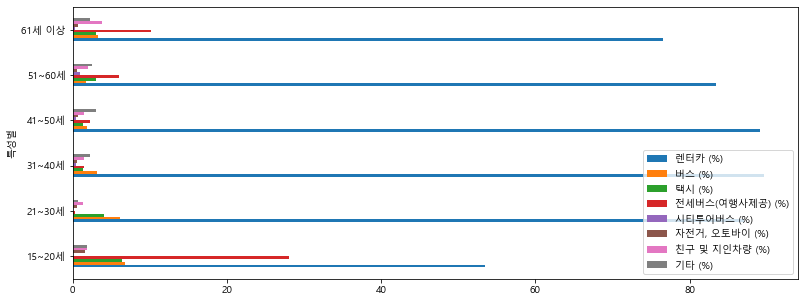

In [7]:
교통 = 제주여행_교통.filter(연령, axis = 0).plot(kind='barh', rot=0, figsize=(13,5))

자유 여행 형태가 많은 것을 감안했을 때, 렌터카의 이용 비율이 많을 것이라 예측이 가능하다.  
패키지 여행은 특성상 여행사에서 제공하는 전세버스를 이용할 것이다. 앞서 10대와 50대 이상에서 패키지 여행 이용 비율이 높았던 것을 참고하였을 때,  
연령별 이용 교통수단에서도 10대와 50대 이상에서 전세버스 이용 비율이 다른 연령대보다 높은 것을 확인할 수 있다.

### 2-2. 경비

In [8]:
제주여행_경비 = 제주여행_경비.set_index('특성별')
제주여행_경비 = 제주여행_경비.drop('응답자수 (명)', axis=1)

#### 성별 여행 경비

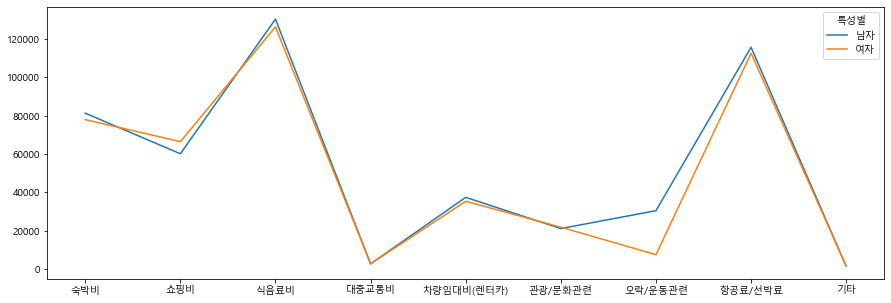

In [9]:
경비_성별 = 제주여행_경비.drop(['전체'], axis = 1).filter(성별, axis = 0).transpose().plot(figsize=(15,5))

남성이 오락/운동관련 비용을 비교적 많이 지출하는 것을 볼 수 있다.

#### 연령별 여행 경비

In [10]:
경비_연령max = 제주여행_경비.filter(['전체'], axis = 1).filter(연령, axis = 0)['전체'].idxmax()
경비_연령min = 제주여행_경비.filter(['전체'], axis = 1).filter(연령, axis = 0)['전체'].idxmin()

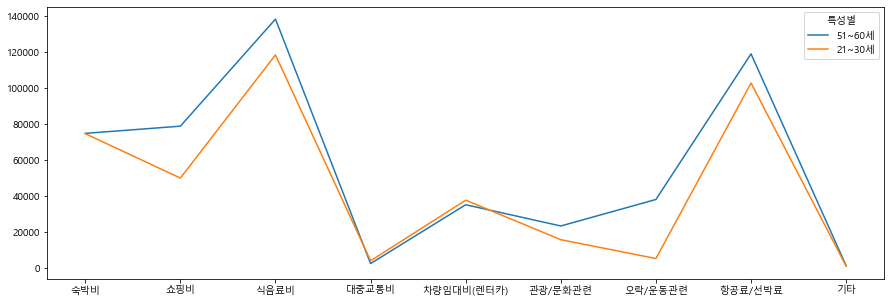

In [11]:
경비_연령 = 제주여행_경비.drop(['전체'], axis = 1).filter([경비_연령max, 경비_연령min], axis = 0).transpose().plot(figsize=(15,5))

가장 차이가 많이 나는 20대와 50대의 여행 경비 분석이다.  
숙박비, 대중교통비, 차량임대비 등 필수적인 요소들은 차이가 거의 없지만, 쇼핑비, 관광/문화, 오락/운동 등 부가적인 요소들에서 50대가 많은 비용을 지출하는 것을 볼 수 있다.

#### 방문횟수별 여행 경비

In [12]:
경비_횟수max = 제주여행_경비.filter(['전체'], axis = 1).filter(방문횟수, axis = 0)['전체'].idxmax()
경비_횟수min = 제주여행_경비.filter(['전체'], axis = 1).filter(방문횟수, axis = 0)['전체'].idxmin()

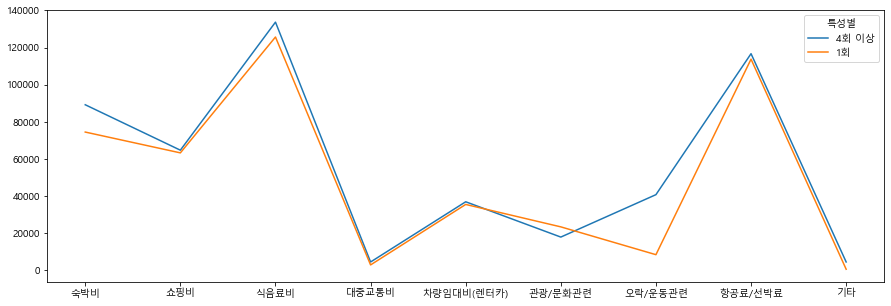

In [13]:
경비_횟수 = 제주여행_경비.drop(['전체'], axis = 1).filter([경비_횟수max, 경비_횟수min], axis = 0).transpose().plot(figsize=(15,5))

제주도를 처음 방문한 사람과 4회 이상 방문한 사람들의 여행 경비 분석이다.  
숙박비와 오락/운동관련 부분에서는 4회 이상 방문한 사람들이 더 많은 비용을 지출하지만, 관광/문화 관련에서는 더 적은 비용을 지출하는 것을 확인할 수 있다.

### 2-3. 숙박

In [14]:
제주여행_숙박 = 제주여행_숙박.set_index('특성별')
제주여행_숙박 = 제주여행_숙박.drop('응답자수 (명)', axis=1)

#### 주요 숙박시설

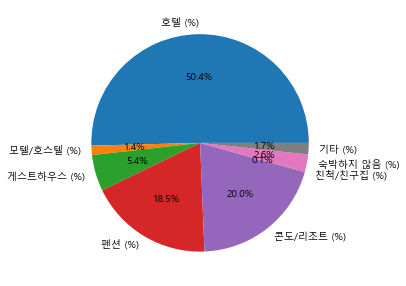

In [15]:
labels = 제주여행_숙박.filter(전체, axis = 0).columns
frequency = 제주여행_숙박.filter(전체, axis = 0).values
숙박 = DataFrame({'frequency':frequency[0]}, index = labels)
숙박 = 숙박['frequency'].plot(kind='pie', label='', autopct='%1.1f%%', figsize=(13,5))

방문객들은 '호텔, 콘도/리조트, 펜션' 순으로 숙박 시설을 이용하고 있는 것을 확인할 수 있다.

## 3. 제주여행 주요 활동 및 만족도 분석

In [16]:
제주여행_활동 = 제주여행_활동.set_index('특성별')
제주여행_활동 = 제주여행_활동.drop('응답자수 (명)', axis=1)
제주여행_만족활동 = 제주여행_만족활동.set_index('특성별')
제주여행_만족활동 = 제주여행_만족활동.drop('응답자수 (명)', axis=1)

#### 주요 활동

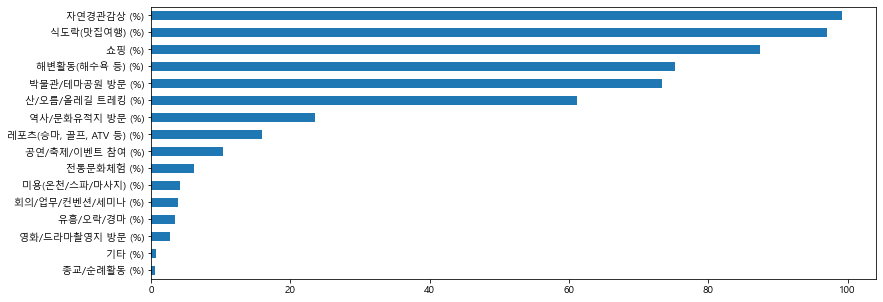

In [17]:
활동_전체 = 제주여행_활동.filter(전체, axis=0).transpose()['소계'].sort_values().plot(kind='barh', figsize=(13,5))

방문객들은 자연경관감상을 가장 많이 하며 그 다음으로 맛집여행과 쇼핑, 해변활동을 주로 하는 것을 볼 수 있다.

#### 활동 만족도

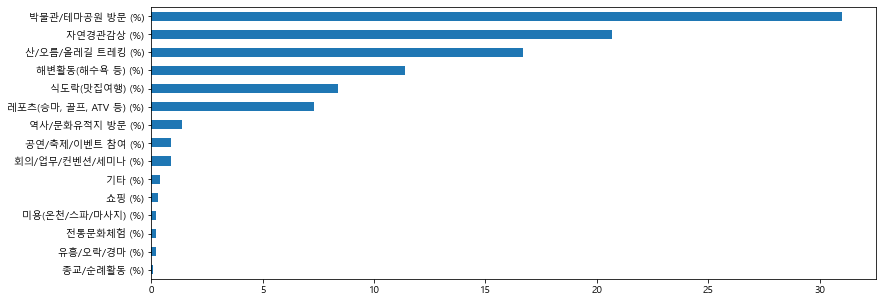

In [18]:
활동_만족도 = 제주여행_만족활동.filter(전체, axis=0).transpose()['소계'].sort_values().plot(kind='barh', figsize=(13,5))

방문객들이 주요활동 중 가장 만족스러워한 활동을 분석한 자료이다.  
가장 많이 즐긴 활동 순위와는 조금 다른 것을 볼 수 있다.  
박물관/테마공원, 자연경관감상, 트레킹 순으로 만족도가 높다.

#### 주요 활동과 만족도 1

In [19]:
주요활동list = 제주여행_활동.filter(전체, axis=0).transpose()['소계'].sort_values(ascending=False).head(6).index
주요활동value = 제주여행_활동.filter(전체, axis=0).transpose()['소계'].sort_values(ascending=False).head(6).values
주요활동data = pd.DataFrame({'주요활동' : 주요활동value}, index = 주요활동list)
만족활동list = 제주여행_만족활동.filter(전체, axis=0).transpose()['소계'].sort_values(ascending=False).head(6).index
만족활동value = 제주여행_만족활동.filter(전체, axis=0).transpose()['소계'].sort_values(ascending=False).head(6).values
만족활동data = pd.DataFrame({'만족활동' : 만족활동value}, index = 만족활동list)
활동data = pd.concat([주요활동data,만족활동data], axis=1)

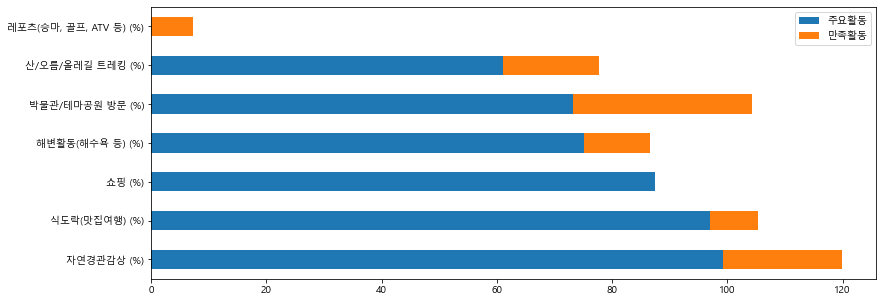

In [20]:
활동 = 활동data.plot(kind = 'barh', stacked='True', figsize=(13,5))

주요 활동과 만족도 높은 활동에서 상위 6개씩 뽑아서 누적하였다.  
자연경관감상이 가장 많이 하는 활동이면서 만족도도 높은 활동이다.  
쇼핑은 주요 활동이면서 만족도가 낮고, 레포츠는 주요 활동 순위에서는 낮지만 만족도는 비교적 높다.  

#### 주요 활동과 만족도 2

In [21]:
활동data = 활동data.dropna(axis=0)
활동list = 활동data.index

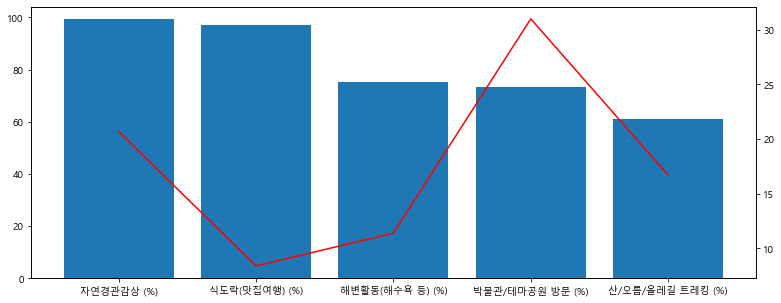

In [22]:
fig, axes = plt.subplots(figsize=(13,5))
axes.bar(활동list, 활동data.filter(['주요활동'],axis=1).transpose().values[0])
axes2 = axes.twinx()
axes2.plot(활동list, 활동data.filter(['만족활동'],axis=1).transpose().values[0], color='r')

주요 활동이면서, 만족도도 높은 활동 5개를 추려보았다.  
박물관/테마공원 방문은 사람들의 기대보다 가장 만족스러운 활동이라고 할 수 있다.

## 4. 제주여행 평가

In [23]:
제주여행_평가 = 제주여행_평가.set_index('특성별')
제주여행_평가 = 제주여행_평가.drop('응답자수 (명)', axis=1)

In [24]:
재방문의향 = ['재방문 의향 (%)', '재방문 의향 (%).1', '재방문 의향 (%).2', '재방문 의향 (%).3', '재방문 의향 (%).4']
타인추천의향 = ['타인 추천의향 (%)', '타인 추천의향 (%).1', '타인 추천의향 (%).2', '타인 추천의향 (%).3', '타인 추천의향 (%).4']
labels = ['전혀 그렇지 않다', '그렇지 않다', '보통', '그렇다', '매우 그렇다']

#### 재방문 의향 및 타인 추천 의향

<BarContainer object of 5 artists>

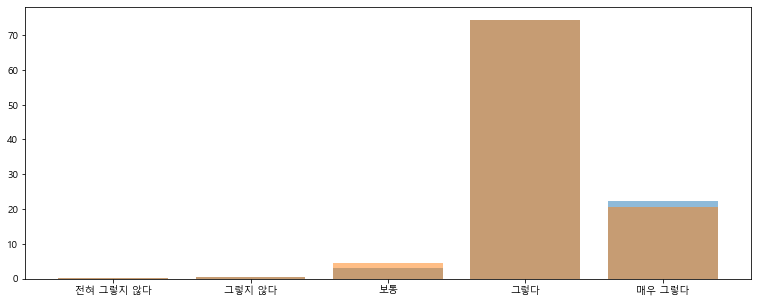

In [25]:
fig, axes = plt.subplots(figsize=(13,5))
axes.bar(labels, 제주여행_평가.filter(전체, axis = 0).filter(재방문의향).values[0], alpha = 0.5)
axes.bar(labels, 제주여행_평가.filter(전체, axis = 0).filter(타인추천의향).values[0], alpha = 0.5)

여행 후 방문객들의 평가이다.  
재방문 의향과 타인 추천 의향이 거의 비슷한 모습을 보이고 있다.  
주로 긍정적인 답변을 한 것을 확인할 수 있다.

## 추가. 제주도 지도

In [26]:
import folium

In [29]:
folium.Map(location = [33.4, 126.5], zoom_start = 11)